# Investigate logistic regression intercept with text

## Try normalization on Yelp review data

In [1]:
# Load review data
import pandas as pd
path = '/data/storyq/yelp_dataset/review_sample.csv'
data = pd.read_csv(path, index_col=0)
data['is_positive'] = data.rating.map(lambda x: True if x=='positive' else False)
data

,review_text,rating,is_positive
0,"As someone who has worked with many museums, I...",negative,False
1,I am actually horrified this place is still in...,negative,False
2,I love Deagan's. I do. I really do. The atmosp...,positive,True
3,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",negative,False
4,"Oh happy day, finally have a Canes near my cas...",positive,True
...,...,...,...
9995,Amazing food. Glorious bevs. What more could y...,positive,True
9996,Wife and I have been going to Abuelos for year...,negative,False
9997,I had THE BEST VEGAN Gardein chicken plate wit...,positive,True
9998,Went there for the first time today and got ve...,positive,True


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = data['review_text']
vectorizer = CountVectorizer(min_df=1000)
feats = vectorizer.fit_transform(corpus) # corpus is a list of strings (documents)
print(feats.shape)

(10000, 113)


In [3]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
# scaler = StandardScaler(with_mean=False)
scaler = StandardScaler()
# feats_norm = scaler.fit_transform(sm.add_constant(feats.A))
feats_norm = scaler.fit_transform(feats.A)
feats_norm

array([[-0.38697222, -0.34774403, -0.32728854, ...,  2.59369408,
         2.0023615 , -0.35231082],
       [ 1.27171711,  1.68942076, -0.32728854, ..., -0.42996421,
         0.09819169, -0.35231082],
       [-0.38697222, -0.34774403, -0.32728854, ..., -0.42996421,
         1.36763823, -0.35231082],
       ...,
       [-0.38697222, -0.34774403, -0.32728854, ..., -0.42996421,
         0.09819169, -0.35231082],
       [ 1.27171711, -0.34774403, -0.32728854, ...,  1.08186493,
         0.09819169,  4.61214413],
       [-0.38697222,  1.68942076, -0.32728854, ..., -0.42996421,
         0.09819169,  1.3025075 ]])

In [4]:
from sklearn.preprocessing import normalize
# feats_n = normalize(sm.add_constant(feats.A))
feats_n = normalize(feats_norm)
feats_n

array([[-0.02920484, -0.02624428, -0.0247005 , ...,  0.19574638,
         0.15111844, -0.02658894],
       [ 0.09131528,  0.12130837, -0.02350086, ..., -0.03087345,
         0.00705063, -0.02529758],
       [-0.04045508, -0.03635406, -0.03421559, ..., -0.04494957,
         0.14297644, -0.03683148],
       ...,
       [-0.06845064, -0.06151166, -0.05789333, ..., -0.0760554 ,
         0.01736891, -0.06231947],
       [ 0.1168897 , -0.03196284, -0.03008268, ...,  0.09943946,
         0.00902528,  0.42392457],
       [-0.04767385,  0.20813173, -0.040321  , ..., -0.05297034,
         0.01209693,  0.16046514]])

In [5]:
# Train statsmodels logit to view intercept
import statsmodels.api as sm
# f = feats_norm.A
# logit = sm.Logit(data.is_positive.values, sm.add_constant(f))
# logit = sm.Logit(data.is_positive.values, sm.add_constant(feats_norm))
logit = sm.Logit(data.is_positive.values, sm.add_constant(feats_n))
# logit = sm.Logit(data.is_positive.values, feats_n)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.286534
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9886
Method:                           MLE   Df Model:                          113
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.4936
Time:                        14:57:47   Log-Likelihood:                -2865.3
converged:                       True   LL-Null:                       -5658.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1348      0.057     37.505      0.000       2.023       2.246
x1            -0.6741      0.406     -1.660      0.097      -1.470       0.122
x2            -2.0009      0.372     -5.377      0.000      -2.730      -1.272
x3            -0.8580      0.348     -2.467      0.014      -1.540      -0.176
x4             1.1498      0.397      2.896      0.004       0.372       1.928
x5             1.2325      0.416      2.963      0.003       0.417       2.048
x6             2.9196      0.461      6.337      0.000       2.017       3.823
x7             8.2041      0.712     11.528      0.000       6.809       9.599
x8             0.0769      0.384      0.200      0.841      -0.675       0.829
x9             4.9761      0.682      7.292      0.000       3.639       6.314
x10            0.2289      0.419      0.547      0.585      -0.592       1.050
x11            1.2145      0.433      2.803      0.005       0.365       2.064
x12           -1.6340      0.415     -3.937      0.000      -2.447      -0.821
x13           -0.8741      0.361     -2.421      0.015      -1.582      -0.167
x14           -1.8264      0.410     -4.453      0.000      -2.630      -1.023
x15           -1.4679      0.378     -3.883      0.000      -2.209      -0.727
x16           -0.8294      0.403     -2.056      0.040      -1.620      -0.039
x17            4.9991      0.454     11.018      0.000       4.110       5.888
x18           -0.6834      0.435     -1.571      0.116      -1.536       0.169
x19           -0.2757      0.380     -0.726      0.468      -1.021       0.469
x20           -0.4593      0.393     -1.170      0.242      -1.229       0.310
x21            0.8176      0.411      1.990      0.047       0.012       1.623
x22            0.1994      0.370      0.539      0.590      -0.526       0.925
x23           -0.5498      0.380     -1.448      0.147      -1.294       0.194
x24            3.8696      0.450      8.597      0.000       2.987       4.752
x25            7.1805      0.697     10.302      0.000       5.814       8.547
x26            0.8337      0.420      1.985      0.047       0.011       1.657
x27           -2.0762      0.379     -5.482      0.000      -2.819      -1.334
x28           -0.9839      0.384     -2.563      0.010      -1.736      -0.231
x29           -2.1915      0.340     -6.439      0.000      -2.859      -1.524
x30           -1.0797      0.361     -2.990      0.003      -1.787      -0.372
x31           -0.4986      0.361     -1.380      0.167      -1.207       0.209
x32            0.2171      0.392      0.554      0.579      -0.550       0.985
x33           -2.1160      0.347     -6.100      0.000      -2.796      -1.436
x34            0.1314      0.441      0.298      0.766      -0.734       0.997
x35            3.4935      0.426      8.203      0.000       2.659       4.328
x36            0.1457      0.380      0.383      0.702      -0.599       0.891
x37           -1.3652      0.398     -3.432      0.001      -2.145      -0.586
x3

## Toy example

In [5]:
import pandas as pd
df = pd.DataFrame([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1],
    [0, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 1],
    [1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 1],
    [0, 0, 0, 1, 0, 0],
    ], columns=['not', 'like', 'you', 'great', 'best', 'is_positive'])
df

,not,like,you,great,best,is_positive
0,1,0,0,0,0,0
1,0,1,0,1,0,1
2,0,1,1,1,0,1
3,1,0,0,0,0,0
4,1,0,0,1,1,1
5,1,0,0,0,0,0
6,1,1,0,0,0,0
7,1,0,0,1,1,1
8,0,0,0,1,0,0


In [6]:
import statsmodels.api as sm

X = df.loc[:, ['not', 'like', 'you', 'great', 'best']]
y = df.is_positive
logit = sm.Logit(y, X)
result = logit.fit()
result.summary()

PerfectSeparationError: Perfect separation detected, results not available

# Load, process Yelp review data

## Load from raw

In [5]:
import json
from tqdm.notebook import tqdm
reviews_path = '/data/storyq/yelp_dataset/yelp_academic_dataset_review.json'
with open(reviews_path) as f:  # 5.9G
    reviews = [json.loads(line) for line in tqdm(f.read().splitlines())]
#     for line in f.read().splitlines():
#         reviews.append(json.loads(next(f)) for x in tqdm(range(int(1e7)))]
len(reviews)

  0%|          | 0/8021122 [00:00<?, ?it/s]

8021122

In [10]:
# Look at years
from collections import defaultdict

years = defaultdict(int)
for review in tqdm(reviews):
    year = review['date'][:4]
    years[int(year)] += 1
years

  0%|          | 0/8021122 [00:00<?, ?it/s]

defaultdict(int,
            {2015: 940603,
             2013: 491678,
             2011: 302523,
             2017: 1217292,
             2009: 100760,
             2016: 1094154,
             2018: 1318054,
             2010: 186752,
             2014: 702060,
             2012: 367367,
             2005: 875,
             2007: 21130,
             2008: 56996,
             2006: 5030,
             2019: 1215836,
             2004: 12})

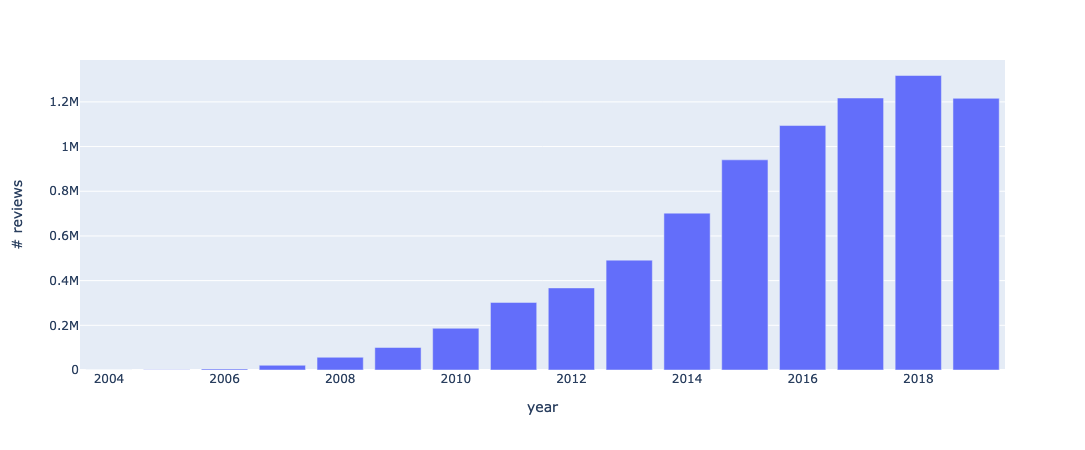

In [12]:
import plotly.express as px

px.bar(x=years.keys(),y=years.values(), labels=dict(x='year', y='# reviews'))

In [2]:
outlines = []
count = 1
for review in reviews:
    if review['stars'] >= 4:
        rating = 'positive'
    elif review['stars'] <= 2:
        rating = 'negative'
    else:
        continue
    outlines.append([review['text'], rating])
    count += 1
    if count > 10000:
        break
len(outlines)

10000

In [3]:
# Save out condensed data
import pandas as pd
data = pd.DataFrame(outlines, columns=['review_text', 'rating'])
outpath = 'review_sample.csv'
data.to_csv(outpath)

## Process to max 5 sentences

In [4]:
# Load condensed data
import pandas as pd
path = '/data/storyq/yelp_dataset/review_sample.csv'
data = pd.read_csv(path, index_col=0)
data

,review_text,rating
0,"As someone who has worked with many museums, I...",negative
1,I am actually horrified this place is still in...,negative
2,I love Deagan's. I do. I really do. The atmosp...,positive
3,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",negative
4,"Oh happy day, finally have a Canes near my cas...",positive
...,...,...
9995,Amazing food. Glorious bevs. What more could y...,positive
9996,Wife and I have been going to Abuelos for year...,negative
9997,I had THE BEST VEGAN Gardein chicken plate wit...,positive
9998,Went there for the first time today and got ve...,positive


In [6]:
# Do sentence tokenization
import spacy
nlp = spacy.load('en', disable=['tagger', 'parser', 'ner'])
nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [7]:
test = data.loc[0, 'review_text']
test

'As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas. When I saw they would be showing infamous eggs of the House of Faberge from the Virginia Museum of Fine Arts (VMFA), I knew I had to go!\n\nTucked away near the gelateria and the garden, the Gallery is pretty much hidden from view. It\'s what real estate agents would call "cozy" or "charming" - basically any euphemism for small.\n\nThat being said, you can still see wonderful art at a gallery of any size, so why the two *s you ask? Let me tell you:\n\n* pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top. For the space and the amount of art you can fit in there, it is a bit much.\n* it\'s not kid friendly at all. Seriously, don\'t bring them.\n* the security is not trained properly for the show. When the curating and design teams collaborate for exhibitions, there is a definite flow. That means visitors should view the ar

In [13]:
doc = nlp(test)
list(doc.sents)

As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas.

In [14]:
data['n_sents'] = data['review_text'].map(lambda x: len(list(nlp(x).sents)))
data

,review_text,rating,n_sents
0,"As someone who has worked with many museums, I...",negative,16
1,I am actually horrified this place is still in...,negative,25
2,I love Deagan's. I do. I really do. The atmosp...,positive,10
3,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",negative,6
4,"Oh happy day, finally have a Canes near my cas...",positive,8
...,...,...,...
9995,Amazing food. Glorious bevs. What more could y...,positive,10
9996,Wife and I have been going to Abuelos for year...,negative,21
9997,I had THE BEST VEGAN Gardein chicken plate wit...,positive,5
9998,Went there for the first time today and got ve...,positive,9


In [17]:
pd.set_option('display.max_colwidth', None)
data[['review_text', 'n_sents']]

,review_text,n_sents
0,"As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas. When I saw they would be showing infamous eggs of the House of Faberge from the Virginia Museum of Fine Arts (VMFA), I knew I had to go!\n\nTucked away near the gelateria and the garden, the Gallery is pretty much hidden from view. It's what real estate agents would call ""cozy"" or ""charming"" - basically any euphemism for small.\n\nThat being said, you can still see wonderful art at a gallery of any size, so why the two *s you ask? Let me tell you:\n\n* pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top. For the space and the amount of art you can fit in there, it is a bit much.\n* it's not kid friendly at all. Seriously, don't bring them.\n* the security is not trained properly for the show. When the curating and design teams collaborate for exhibitions, there is a definite flow. That means visitors should view the art in a certain sequence, whether it be by historical period or cultural significance (this is how audio guides are usually developed). When I arrived in the gallery I could not tell where to start, and security was certainly not helpful. I was told to ""just look around"" and ""do whatever."" \n\nAt such a *fine* institution, I find the lack of knowledge and respect for the art appalling.",16
1,"I am actually horrified this place is still in business. My 3 year old son needed a haircut this past summer and the lure of the $7 kids cut signs got me in the door. We had to wait a few minutes as both stylists were working on people. The decor in this place is total garbage. It is so tacky. The sofa they had at the time was a pleather sofa with giant holes in it. And my son noticed ants crawling all over the floor and the furniture. It was disgusting and I should have walked out then. Actually, I should have turned around and walked out upon entering but I didn't. So the older black male stylist finishes the haircut he was doing and it's our turn. I tell him I want a #2 clipper around the back and sides and then hand cut the top into a standard boys cut. Really freaking simple, right? WRONG! Rather than use the clippers and go up to actually cut the hair, he went down. Using it moving downward doesn't cut hair, it just rubs against it. How does this man who has an alleged cosmetology license not know how to use a set of freaking clippers??? I realized almost immediately that he had no idea what he was doing. No idea at all. After about 10 minutes of watching this guy stumble through it, I said ""you know what? That's fine."", paid and left. All I wanted to do was get out of that scummy joint and take my son to a real haircut place.\n\nBottom line: DO NOT GO HERE. RUN THE OTHER WAY!!!!!",25
2,"I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and house fries are my standbys. The fries are sometimes good and sometimes great, and the spicy dipping sauce they come with is to die for. The beer list is amazing and the cocktails are great. The prices are mid-level, so it's not a cheap dive you can go to every week, but rather a treat when you do. Try it out. You won't be disappointed!",10
3,"Dismal, lukewarm, defrosted-tasting ""TexMex"" glop;\n\nMumbly, unengaged waiter;\n\nClueless manager, who seeing us with barely nibbled entrees\non plates shoved forward for pickup, thanked us\nperfunctorily for our patronage;\n\nWe're from the Texas Hill Country;\ndown there, we jail critters \nwho serve up grub this bad,\nfor their own protection.\n\nNever, never, NEVER again\n(Back to Yard House for real food)",6
4,"Oh happy day, finally have a Canes near my casa. Yes just as others are griping about the Drive thru is packed just like most of the other canes in the area but I like to go sit down to enjoy my chicken. The cashiers are pleasant and as far as food wise i have yet to receive any funky chicken. 

In [18]:
short = data[data['n_sents']<=5]
len(short)

4615

# Sample Yelp review data

In [21]:
# Balanced sampling between negative and positive ratings
sample = pd.concat([short[short['rating']=='positive'].sample(500), short[short['rating']=='negative'].sample(500)])
sample = sample.sample(frac=1) # shuffle
sample['rating'].value_counts()

positive    500
negative    500
Name: rating, dtype: int64

In [22]:
short_train = sample.iloc[:500]
short_test = sample.iloc[500:]
print(len(short_train))
print(len(short_test))
short_train['rating'].value_counts()

500
500


positive    250
negative    250
Name: rating, dtype: int64

In [24]:
short_train.to_csv('/data/storyq/yelp_dataset/yelp_reviews_short_balanced500_train.csv')
short_test.to_csv('/data/storyq/yelp_dataset/yelp_reviews_short_balanced500_test.csv')

In [2]:
# Load review data
import pandas as pd
path = 'review_sample10000.csv'
data = pd.read_csv(path, index_col=0)
data

,review_text,rating
0,"As someone who has worked with many museums, I...",negative
1,I am actually horrified this place is still in...,negative
2,I love Deagan's. I do. I really do. The atmosp...,positive
3,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",negative
4,"Oh happy day, finally have a Canes near my cas...",positive
...,...,...
9995,Amazing food. Glorious bevs. What more could y...,positive
9996,Wife and I have been going to Abuelos for year...,negative
9997,I had THE BEST VEGAN Gardein chicken plate wit...,positive
9998,Went there for the first time today and got ve...,positive


In [6]:
# Balanced sampling between negative and positive ratings
sample = pd.concat([data[data['rating']=='positive'].sample(500), data[data['rating']=='negative'].sample(500)])
sample = sample.sample(frac=1) # shuffle
sample['rating'].value_counts()

negative    500
positive    500
Name: rating, dtype: int64

In [7]:
# Save out
outpath = 'yelp_reviews_1000balanced.csv'
sample.to_csv(outpath)

# Train sentiment classifier

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
test_size = int(0.1 * len(data))
text_train, text_test, y_train, y_test = train_test_split(data['review_text'], data['rating'], test_size=test_size, random_state=7)
corpus = data['review_text']
vectorizer = TfidfVectorizer(min_df=1)
x_train = vectorizer.fit_transform(text_train) # corpus is a list of strings (documents)
x_test = vectorizer.transform(text_test) # corpus is a list of strings (documents)
print(x_train.shape)
print(x_test.shape)

(9000, 24634)
(1000, 24634)


In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear')
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
clf.score(x_test, y_test)

0.911

# Try on AI experiences data

## From Yelp-trained logistic regression classifier

In [20]:
# path = '/home/mamille2/storyq/ai_experiences.csv'
path = 'ai_experiences.csv'
experiences = pd.read_csv(path)
experiences

,Text,Label,Shiyan,Cansu,Jie,Madeline,Criteria,Other Notes,Unnamed: 8
0,"Siri knows the true meaning of Christmas, offe...",Positive,Positive as it's a good experience although th...,"I thought it might be neutral, but then after ...",Started with a negative sacstic crique but lat...,"Positive: Humor of experience, and knowing a l...",NaN,Weight towards what sentence?,NaN
1,One of the most common interactions I have wit...,Positive,Neutral as it's a state of fact and it feels l...,I think the participant appreciates the opport...,The writer had a mixture of feelings toward AI...,"Negative: Sense of ""too comfortable"" and too g...",If there is a transition from one side to the ...,NaN,NaN
2,I remember one day while I was in graduate sch...,Positive,The negative part comes from the writer's frie...,"I think it is a funny story and in general, po...",Positive because AI technology seemed to be us...,Positive: The humor involved in pranks; AI as ...,"AI technology itself, not the people using it","Humor as positive, involving minor misfortune;...",NaN
3,"Last week, my family was talking about winter ...",Still debating,It tends to be negative as the writer did not ...,Positive; at first the attitude is negative bu...,"Negative. Surprised, felt somewhat creepy, end...","Weird coincidence, so mildly negative; people ...",Would this person want to use AI or not? (Cansu),Making inferences is a human thing; consistent...,No agreement on last quote
4,My Apple watch counts each hour in which I hav...,NaN,NaN,NaN,NaN,NaN,Would this person have this experience again? ...,NaN,NaN
5,One of the most frustrating encounters with AI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Facebook tries to be helpful. Whenever I am o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Yesterday, I chatted with Emma, an agent that ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"I, like most people, use Google search several...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,I love using navigation apps to get places. Es...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
corpus = experiences['Text']
bow = vectorizer.transform(corpus) # corpus is a list of strings (documents)
bow.shape

(14, 24634)

In [24]:
experiences['yelp10k_classifier'] = clf.predict(bow)
experiences.loc[:, ['Text', 'yelp10k_classifier']]

,Text,yelp10k_classifier
0,"Siri knows the true meaning of Christmas, offe...",positive
1,One of the most common interactions I have wit...,positive
2,I remember one day while I was in graduate sch...,negative
3,"Last week, my family was talking about winter ...",positive
4,My Apple watch counts each hour in which I hav...,negative
5,One of the most frustrating encounters with AI...,positive
6,Facebook tries to be helpful. Whenever I am o...,positive
7,"Yesterday, I chatted with Emma, an agent that ...",negative
8,"I, like most people, use Google search several...",positive
9,I love using navigation apps to get places. Es...,positive


In [25]:
experiences['yelp10k_classifier']

0     positive
1     positive
2     negative
3     positive
4     negative
5     positive
6     positive
7     negative
8     positive
9     positive
10    positive
11    positive
12    positive
13    negative
Name: yelp10k_classifier, dtype: object

## Show top features

In [30]:
import numpy as np
def print_top_features(vectorizer, clf, n=20):
    """Prints features with the highest coefficient values"""
    feature_names = vectorizer.get_feature_names()
    top_indices = np.argsort(clf.coef_[0])[-1*n:]
    print("\n".join(reversed([feature_names[j] for j in top_indices])))

In [32]:
import numpy as np
def print_bottom_features(vectorizer, clf, n=20):
    """Prints features with the highest coefficient values"""
    feature_names = vectorizer.get_feature_names()
    top_indices = np.argsort(clf.coef_[0])[:n]
    print("\n".join(reversed([feature_names[j] for j in top_indices])))

In [31]:
print_top_features(vectorizer, clf)

great
amazing
delicious
love
best
and
awesome
definitely
friendly
excellent
always
perfect
good
nice
little
loved
fantastic
very
highly
with


In [33]:
print_bottom_features(vectorizer, clf)

slow
then
won
left
poor
nothing
money
bad
over
asked
told
ok
bland
horrible
never
terrible
rude
worst
no
not


In [ ]:
def get_informative_features(features_vectorizer, model, model_name, data_dirpath, n=10000):
    feats_index2name = {v: k for k, v in features_vectorizer.vocabulary_.items()}
    feature_weights = model.coef_[0]
    
    top_indices = np.argsort(feature_weights)[-1*n:]
    top_weights = np.sort(feature_weights)[-1*n:]
    bottom_indices = np.argsort(feature_weights)[:n]
    bottom_weights = np.sort(feature_weights)[:n]

    nontag_lines = [] # to sort and print
    lines = [] # to sort and print
    
    for i, (j, w) in enumerate(zip(reversed(top_indices), reversed(top_weights))):
        feature_name = feats_index2name[j]
        if not feature_name.startswith('tag'):
            nontag_lines.append([i, feature_name, w, abs(w)])
#             print(f"{i}\t{feature_name}\t{w: .3f}")
        lines.append([i, feature_name, w, abs(w)])
    
    for i, (j, w) in enumerate(zip(bottom_indices, bottom_weights)):
        feature_name = feats_index2name[j]
        if not feature_name.startswith('tag'):
            nontag_lines.append([i, feature_name, w, abs(w)])
        lines.append([i, feature_name, w, abs(w)])


## From NLTK SentimentAnalyzer

In [17]:
from nltk.sentiment import SentimentAnalyzer

AttributeError: module 'scipy' has no attribute '_lib'